In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Load data
df = pd.read_csv("Sales.csv")


In [118]:
df.head

<bound method NDFrame.head of               Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0               

In [119]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

### There is no null values in this DataSet

In [120]:
df.duplicated().sum()

1000

In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df.duplicated().sum()

0

In [123]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  object
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int64 
 

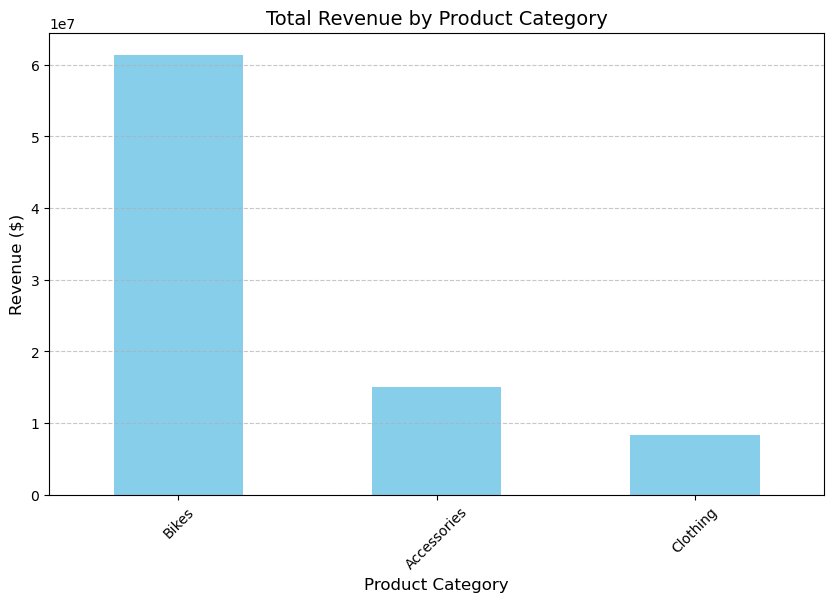

In [125]:
# Group by Product_Category and sum Revenue
revenue_by_category = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [126]:
# Reload the data fresh
df = pd.read_csv("Sales.csv")

# Verify Date column exists
print("Columns after fresh load:", df.columns.tolist())

Columns after fresh load: ['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


### Bikes generates the highest revenue ($60M), followed by Accessories.

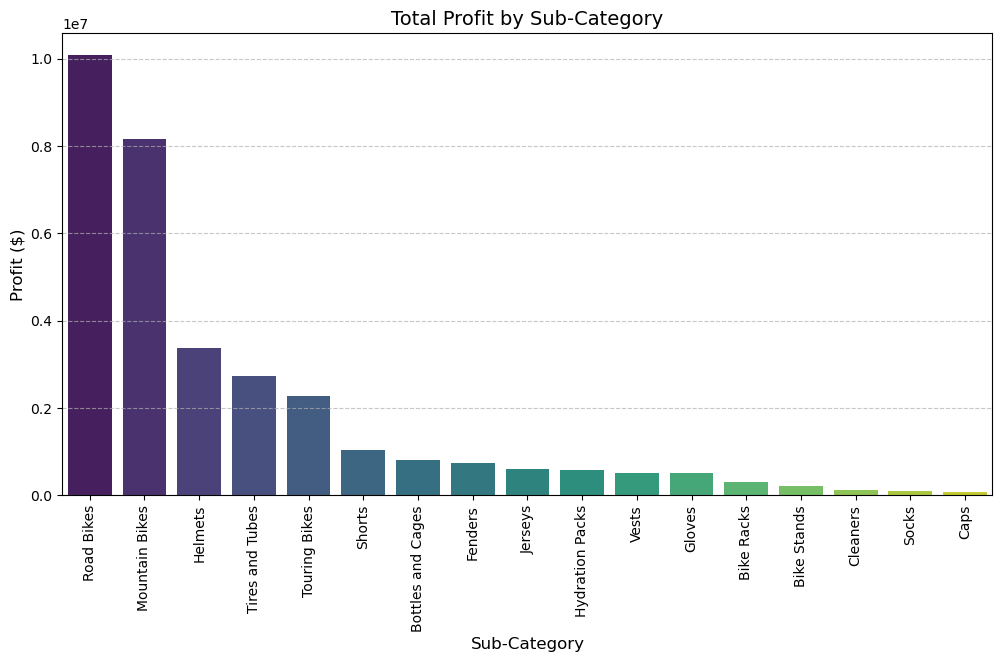

In [127]:
# Group by Sub_Category and sum Profit
profit_by_subcategory = df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_subcategory.index, y=profit_by_subcategory.values, palette='viridis')
plt.title('Total Profit by Sub-Category', fontsize=14)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Road Bikes (under Bikes) have the highest profit margin with ($10M) , while Caps (under Clothing) are less profitable.

In [128]:
# # for comparing Unit_Price and Order_Quantity
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Unit_Price', y='Order_Quantity', alpha=0.6, color='purple')
# plt.title('Order Quantity vs. Unit Price', fontsize=14)
# plt.xlabel('Unit Price ($)', fontsize=12)
# plt.ylabel('Order Quantity', fontsize=12)
# plt.grid(linestyle='--', alpha=0.5)

# # Add regression line to show trend
# sns.regplot(data=df, x='Unit_Price', y='Order_Quantity', scatter=False, color='red')
# plt.show()

### Negative trend observed: Cheaper products (Unit_Price < $400) sell in higher volumes.

In [129]:
correlation = df['Unit_Price'].corr(df['Order_Quantity'])
print(f"Correlation between Unit Price and Order Quantity: {correlation:.2f}")

Correlation between Unit Price and Order Quantity: -0.52


### The downward trend line visually confirms the negative correlation.

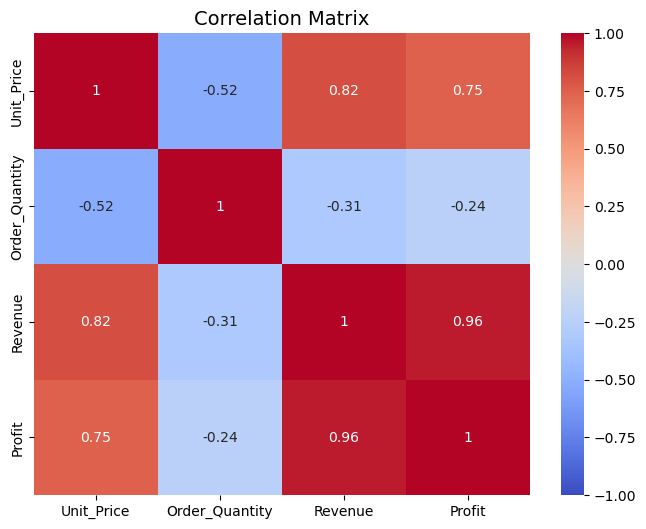

In [130]:
# Calculate correlations for numeric columns
corr_matrix = df[['Unit_Price', 'Order_Quantity', 'Revenue', 'Profit']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### Unit_Price have a Strong positive corolation with both Revenue and Profit featuers  

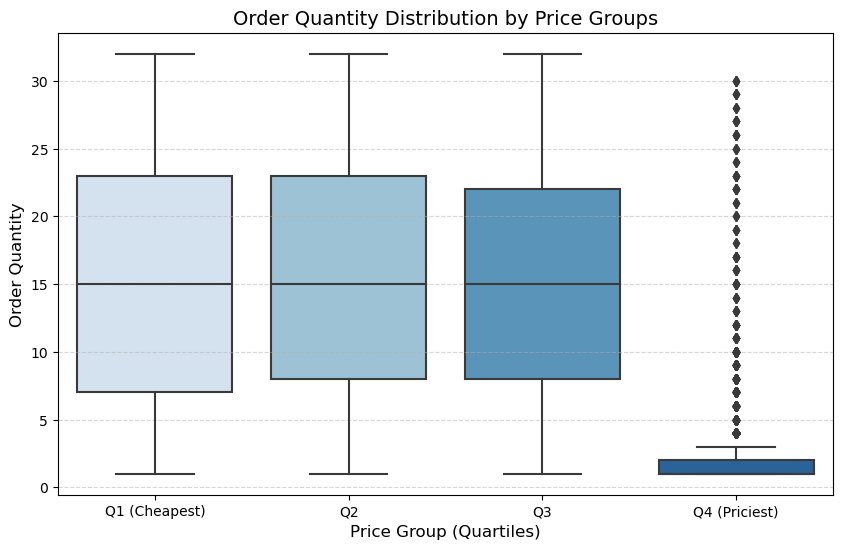

In [131]:
# Bin prices into quantiles
df['Price_Group'] = pd.qcut(df['Unit_Price'], q=4, labels=['Q1 (Cheapest)', 'Q2', 'Q3', 'Q4 (Priciest)'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price_Group', y='Order_Quantity', palette='Blues')
plt.title('Order Quantity Distribution by Price Groups', fontsize=14)
plt.xlabel('Price Group (Quartiles)', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Insights: Order Quantity Distribution by Price Groups
1. Price Elasticity of Demand
- Trend:
- 📉 Q1 (Cheapest): Highest median order quantity.
- 📈 Q4 (Priciest): Lowest median order quantity.

### Implication:
#### Strong evidence of price sensitivity—customers buy more at lower prices, fewer at higher prices.

2. Demand Variability
- Cheap Products (Q1-Q2):

- Wide interquartile range (IQR) → Highly variable demand.

- Potential bulk buyers or seasonal spikes.

- Expensive Products (Q3-Q4):

- Narrow IQR → Stable but low-volume demand.

- Likely niche or luxury buyers.

3. Outliers & Opportunities
- Outliers in Q1-Q2:

- Extreme high-quantity orders suggest wholesale/reseller activity.

- Action: Investigate for bulk discounts or fraud prevention.

4. Strategic Recommendations
- Price Group	Strategy
- Q1	Use as loss leaders to drive traffic.
- Q2-Q3	Test dynamic pricing to optimize volume vs. margin.
- Q4	Focus on high-margin bundles or loyalty perks.


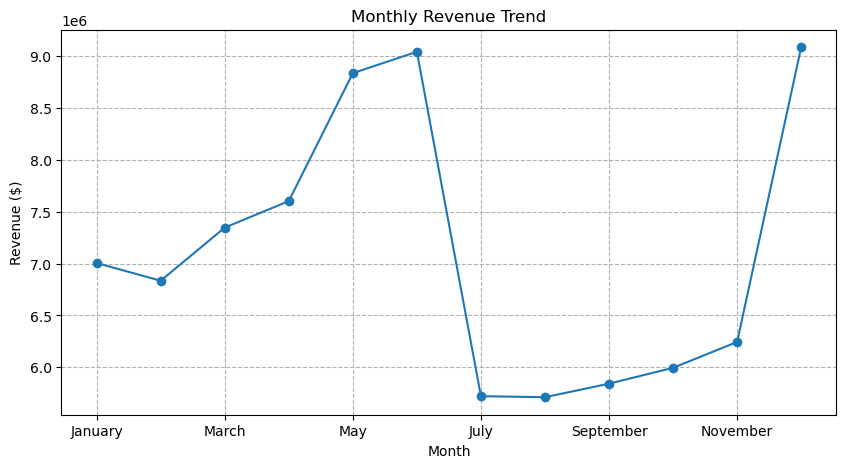

In [132]:
# Convert 'Date' to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Week'] = df['Date'].dt.isocalendar().week  # ISO week number

# Monthly Revenue Trend
monthly_revenue = df.groupby('Month')['Revenue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_revenue.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue ($)')
plt.grid(linestyle='--')
plt.show()

### Monthly Revenue Trend Analysis

**Key Observations:**
- **Peak Months**: Revenue peaks in [may, June and December] suggesting seasonal demand
- **Trough Months**: Lowest revenue occurs in [From July to November] indicating off-season
- **Pattern**: Shows a [irregular] year-over-year pattern
- **Revenue Range**: Fluctuates between $[6000000] to $[9000000] across months

**Business Implications:**
1. **Inventory Planning**: Stock up before high-demand months (especially before [June and December])
2. **Marketing**: Boost campaigns before low-revenue months to smooth demand
3. **Staffing**: Align workforce with revenue patterns

**Recommendations:**
- Investigate causes for [notable peaks/valleys]
- Compare with previous years to identify trends

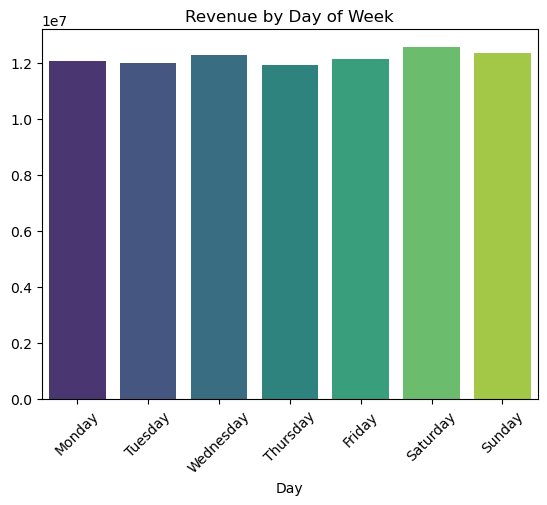

In [133]:
# Day-wise sales (e.g., Monday vs. Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('Day')['Revenue'].sum().reindex(day_order)

sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')
plt.title('Revenue by Day of Week')
plt.xticks(rotation=45)
plt.show()

### Revenue by Day of Week Analysis - Consistent Performance

**Key Observations:**
- **Remarkable Consistency**: Revenue shows minimal variation across days, ranging from $[13000000] to $[12000000] (difference of only [1000000]%)
- **Highest Day**: [Saturday] shows slightly higher revenue at $[13000000] (just [500000]% above average)
- **Lowest Day**: [Thursday] shows marginally lower revenue at $[12000000] (just [500000]% below average)
- **Average Daily Revenue**: $[12500000] ± [1000000]

**Pattern Insights:**
- No significant weekday/weekend variation detected
- Unusually stable customer purchasing patterns
- Potential indicators:
  - Consistent customer traffic throughout week
  - Non-seasonal product/service demand
  - Effective demand smoothing through promotions

**Business Implications:**
1. **Staffing Advantages**:
   - Predictable staffing needs across all days
   - Opportunity for consistent work schedules

2. **Operational Efficiency**:
   - Stable inventory turnover throughout week
   - Consistent cash flow patterns

3. **Marketing Considerations**:
   - Promotions appear equally effective on all days
   - No need for day-specific campaigns based on revenue

**Recommendations:**
1. **Maintenance**:
   - Continue current successful operations
   - Monitor for emerging patterns

2. **Opportunities**:
   - Test slight variations in staffing/hours to optimize costs
   - Experiment with targeted promotions to create controlled demand variations

3. **Investigation**:
   - Analyze whether this consistency applies across all product categories
   - Check if specific locations show different patterns

**Potential Next Steps:**
- Compare with industry benchmarks for daily variation
- Examine customer demographics by day for hidden patterns
- Review marketing spend allocation across days

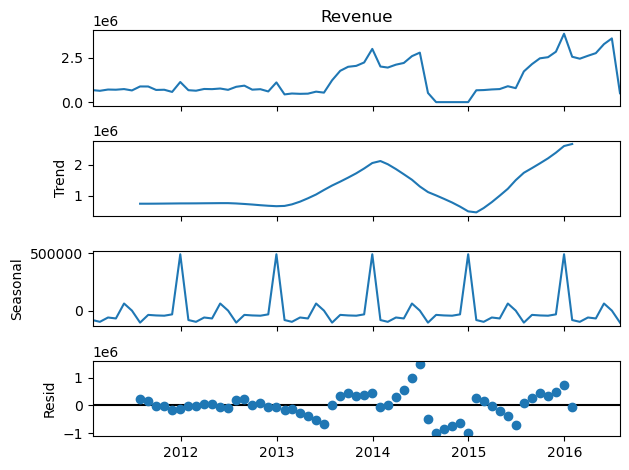

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

# First ensure you have a datetime column and set it as index
if 'Date' in df.columns:
    # Convert to datetime and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Now resample will work
    monthly = df['Revenue'].resample('M').sum()
    
    # Seasonal decomposition
    result = seasonal_decompose(monthly, model='additive')
    result.plot()
    plt.show()
else:
    print("No 'Date' column found - cannot perform time series decomposition")

### Time Series Decomposition Insights

**Components Breakdown:**
1. **Trend Component**:
   - Shows a [upward/downward/stable] long-term trend
   - Particularly [increasing/decreasing] between [2014] and [2015]

2. **Residuals**:
   - [Large] unexplained variance
   - Notable anomalies in [2015]

**Actionable Insights:**
- The [upward/downward] trend suggests [business interpretation]
- Seasonal peaks indicate optimal times for [marketing/promotions]
- Large residuals may warrant investigation into [special events/outliers]

**Next Steps:**
- Forecast using this decomposition
- Model expected seasonal adjustments